In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
select_year = 2017

## Open Data

In [3]:

input = './data/%d/preprocess.csv.xz' % select_year
df = pd.read_csv(input, compression='xz')
#df.info()

## SnowballStemmer

In [4]:
stemmer = SnowballStemmer("english")
df['titulo'] = df['titulo'].map(lambda x: ' '.join([stemmer.stem(y) for y in x.split(' ')]))

## TF-IDF

In [5]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=.0025, max_df=.1, ngram_range=(1,2))
tfidf = tfidf_vectorizer.fit_transform(df['titulo'])

weights = np.asarray(tfidf.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tfidf_vectorizer.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)



,term,weight
854,learn,0.016803
1442,softwar,0.015193
1201,problem,0.014903
952,method,0.014155
427,detect,0.013541
545,evalu,0.013395
1204,process,0.012890
433,develop,0.012832
299,comput,0.012765
1085,optim,0.012352


In [6]:
print('vocabulary:', len(tfidf_vectorizer.vocabulary_))
print('sparse matrix shape:', tfidf.shape)
print('nonzero count:', tfidf.nnz)
print('sparsity: %.2f%%' % (100.0 * tfidf.nnz / (tfidf.shape[0] * tfidf.shape[1])))

vocabulary: 1729
sparse matrix shape: (3055, 1729)
nonzero count: 48396
sparsity: 0.92%


## NMF

In [7]:
nmf = NMF(n_components=50, solver="mu")
W = nmf.fit_transform(tfidf)
H = nmf.components_

idx_to_word = np.array(tfidf_vectorizer.get_feature_names())
for i, topic in enumerate(H):
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word[topic.argsort()[-10:]]])))

Topic 1: deep learn,imag classif,classif use,descriptor,deep,textur,recognit,imag,featur,classif
Topic 2: case studi,evalu,agil,case,softwar engin,project,engin,softwar develop,develop,softwar
Topic 3: locat,neighborhood,search,schedul problem,solv,rout problem,heurist,schedul,rout,problem
Topic 4: devic,evalu use,cost,stochast,low,communic,perform evalu,power,evalu,perform
Topic 5: object,reinforc,environ,reinforc learn,adapt,base learn,learn environ,learn object,educ,learn
Topic 6: complex,larg,free,threshold,convex,path,modal,color,edg,graph
Topic 7: underwat,rout,channel,network use,sink,industri,sensor network,wireless sensor,wireless,sensor
Topic 8: capac plan,platform,big,plan,privaci,secur,comput,cloud comput,servic,cloud
Topic 9: explor,gpu base,low,schedul,forecast,seri,time seri,real time,real,time
Topic 10: map studi,requir,systemat map,systemat review,systemat literatur,map,literatur review,literatur,review,systemat
Topic 11: user,experi,automot,track,virtual realiti,educ,

In [8]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.3f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

no_top_words = 10
feature_names = tfidf_vectorizer.get_feature_names()
display_topics(nmf,idx_to_word,no_top_words)


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,...,Topic 45 words,Topic 45 weights,Topic 46 words,Topic 46 weights,Topic 47 words,Topic 47 weights,Topic 48 words,Topic 48 weights,Topic 49 words,Topic 49 weights
0,classif,2.097,softwar,2.408,problem,2.424,perform,1.535,learn,2.588,...,interact,2.482,da,1.436,dynam,2.442,techniqu,2.251,generat,2.122
1,featur,1.077,develop,1.159,rout,0.427,evalu,1.170,educ,0.432,...,human,0.558,para,1.386,servic,0.342,recommend,0.718,automat,1.080
2,imag,0.949,softwar develop,0.661,schedul,0.404,power,0.971,learn object,0.421,...,user,0.344,em,1.347,dynam analysi,0.324,predict,0.628,code,0.499
3,recognit,0.569,engin,0.525,heurist,0.397,perform evalu,0.517,learn environ,0.391,...,multimod,0.342,uma,0.657,molecular,0.299,data techniqu,0.503,assess,0.379
4,textur,0.557,project,0.463,rout problem,0.389,communic,0.492,base learn,0.282,...,robot,0.282,um,0.511,integr,0.294,monitor,0.379,code generat,0.375
5,deep,0.555,softwar engin,0.405,solv,0.388,low,0.402,adapt,0.275,...,stabil,0.247,brasil,0.252,chang,0.289,techniqu use,0.288,automat code,0.332
6,descriptor,0.465,case,0.369,schedul problem,0.335,stochast,0.270,reinforc learn,0.245,...,induct,0.219,dos,0.223,dynam approach,0.285,compar,0.244,framework,0.304
7,classif use,0.410,agil,0.363,search,0.321,cost,0.264,environ,0.243,...,law,0.206,na,0.216,vehicl,0.234,link,0.243,novel,0.271
8,imag classif,0.355,evalu,0.325,neighborhood,0.293,evalu use,0.253,reinforc,0.228,...,usabl,0.192,behavior,0.157,chain,0.233,dataset,0.230,signal,0.255
9,deep learn,0.334,case studi,0.324,locat,0.261,devic,0.245,object,0.226,...,transmiss,0.186,autom,0.133,equat,0.204,link data,0.229,voltag,0.233


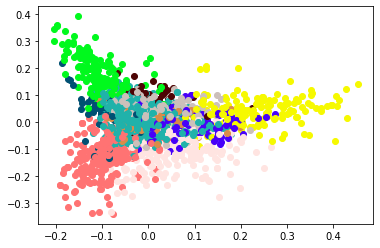

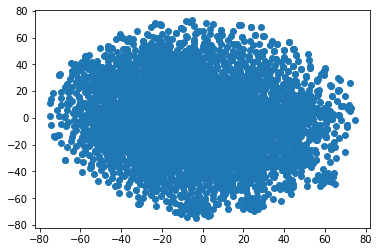

In [9]:
num_clusters = 10
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2

# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

labels = clustering_model.fit_predict(tfidf)
#print(labels)

X = tfidf.todense()

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
#print(reduced_data)

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    #print(instance, index, labels[index])
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()

# t-SNE plot
embeddings = TSNE(n_components=tsne_num_components)
Y = embeddings.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.show()